**Mobina Salimipanah - 99109788**

## Introduction
This exercise explores polynomial regression, a form of regression analysis where the relationship between the independent variable \( X \) and the dependent variable \( y \) is modeled as an \( n \)th degree polynomial. We will create a synthetic dataset, train models with varying degrees of polynomials, and evaluate their performance on different test sets.

## Task
We want to use polynomial regression to model the relationship between the independent variable \( X \) and the dependent variable \( y \).

## Dataset
We will create a synthetic dataset using the given equation. We will use this dataset to train polynomial regression models with varying degrees of polynomials.
We will also create different test sets to evaluate the models' performance.

## Objective
We want to find the degree of the polynomial that best fits the relationship between the independent variable \( X \) and the dependent variable \( y \). We will use the mean squared error (MSE) to evaluate the models' performance on different test sets.

## Plan
1. Create a synthetic dataset using the given equation.
2. Split the dataset into training and testing sets.
3. Train polynomial regression models with varying degrees of polynomials.
4. Evaluate the models' performance on different test sets using the mean squared error (MSE).
5. Find the degree of the polynomial that best fits the relationship between the independent variable \( X \) and the dependent variable \( y \).



# Implementation (100 Points)
We will start by creating a synthetic dataset using the given equation.

## 1. Create a synthetic dataset (20 Points)
First, define a function to generate a dataset with 1000 samples in the range of **-4 to -1** from a polynomial with added noise. Assume that the noise is from a normal distribution and has a mean of 0 and std of 5.

The relationship between the independent variable \( X \) and the dependent variable \( y \) is given by the following equation:

\[ y = 0.1X^5 + X^4 - 2X^3 + 7X^2 - 9X + 3 \]

Generate the independent variable \( X \) using the `numpy` library and then calculate the dependent variable \( y \) using the given equation.

In [1]:
import numpy as np

def generate_dataset(range_start, range_end, num_samples, noise_std=5.0):
    X = np.linspace(range_start, range_end, num_samples)
    y = 0.1 * X**5 + X**4 - 2 * X**3 + 7 * X**2 - 9 * X + 3

    noise = np.random.normal(0, noise_std, num_samples)
    y += noise

    return X, y

X, y = generate_dataset(-4, -1, 1000)
X[:5], y[:5]


(array([-4.        , -3.996997  , -3.99399399, -3.99099099, -3.98798799]),
 array([435.73406167, 433.71073   , 421.84390577, 416.95134684,
        429.76483367]))

In [2]:
X, y = generate_dataset(-4, -1, 1000)

## 2. Splitting the Dataset (5 Points)
Split the dataset into training and two test sets with the same length, ensuring one test set is in the range of the training data and the other is in the **range of 5 to 7.**

In [3]:
from sklearn.model_selection import train_test_split

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_test_in_range, X_test_unused, y_test_in_range, y_test_unused = train_test_split(
    X_temp, y_temp, test_size=0.5, random_state=42 )

# Generate out-of-range testing set for the range 5 to 7
X_test_out_of_range, y_test_out_of_range = generate_dataset(5, 7, len(X_test_in_range))



## 3. Polynomial Regression Training (30 Points)
Train polynomial regression models of varying degrees from degree = 2 to degree = 7. You can use the `preprocessing`, `linear_model`, and `pipeline` classes of the `sklearn` library.

In [4]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline

def train_polynomial_regression(X, y, degree):

    pipeline = Pipeline([
        ("poly_features", PolynomialFeatures(degree=degree, include_bias=False)),
        ("lin_reg", LinearRegression())
    ])

    pipeline.fit(X.reshape(-1, 1), y)
    return pipeline

In [5]:
models = {}
for d in range(2, 8):
    models[d] = train_polynomial_regression(X_train, y_train, d)

## 4. Model Evaluation (15 Points)
Evaluate the models on both test sets using MSE. You can use the `mean_squared_error` from `sklearn.metrics`.


In [6]:
from sklearn.metrics import mean_squared_error

def evaluate_models(models, X_test, y_test):
    losses = {}
    for degree, model in models.items():
        y_pred = model.predict(X_test.reshape(-1, 1))
        mse = mean_squared_error(y_test, y_pred)
        losses[degree] = mse
    return losses


In [7]:
losses_train = evaluate_models(models, X_train, y_train)
losses_in_range = evaluate_models(models, X_test_in_range, y_test_in_range)
losses_out_of_range = evaluate_models(models, X_test_out_of_range, y_test_out_of_range)


losses_in_range



{2: 35.28378348971785,
 3: 27.067721875135124,
 4: 27.232892335284497,
 5: 27.228405014117534,
 6: 27.233578478608987,
 7: 26.957277378716284}

## 5. Plotting Model Scores (20 Points)

Now to evaluate the performance of the polynomial regression models, plot the **logarithm** of losses of the training and two test sets based on the model degree varying from 3 to 7. Train the model a few times to get a sense of how the results can change.


In [17]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

iterations = 5
degrees = range(3, 8)

training_losses = {degree: [] for degree in degrees}
in_range_losses = {degree: [] for degree in degrees}
out_range_losses = {degree: [] for degree in degrees}

for _ in range(iterations):
    X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=None)
    X_test_in_range, X_test_unused, y_test_in_range, y_test_unused = train_test_split(
        X_temp, y_temp, test_size=0.5, random_state=None)

    models = {degree: train_polynomial_regression(X_train, y_train, degree) for degree in degrees}

    for degree, model in models.items():
        y_train_pred = model.predict(X_train.reshape(-1, 1))
        training_losses[degree].append(mean_squared_error(y_train, y_train_pred))

        y_test_in_pred = model.predict(X_test_in_range.reshape(-1, 1))
        in_range_losses[degree].append(mean_squared_error(y_test_in_range, y_test_in_pred))

        y_test_out_pred = model.predict(X_test_out_of_range.reshape(-1, 1))
        out_range_losses[degree].append(mean_squared_error(y_test_out_of_range, y_test_out_pred))



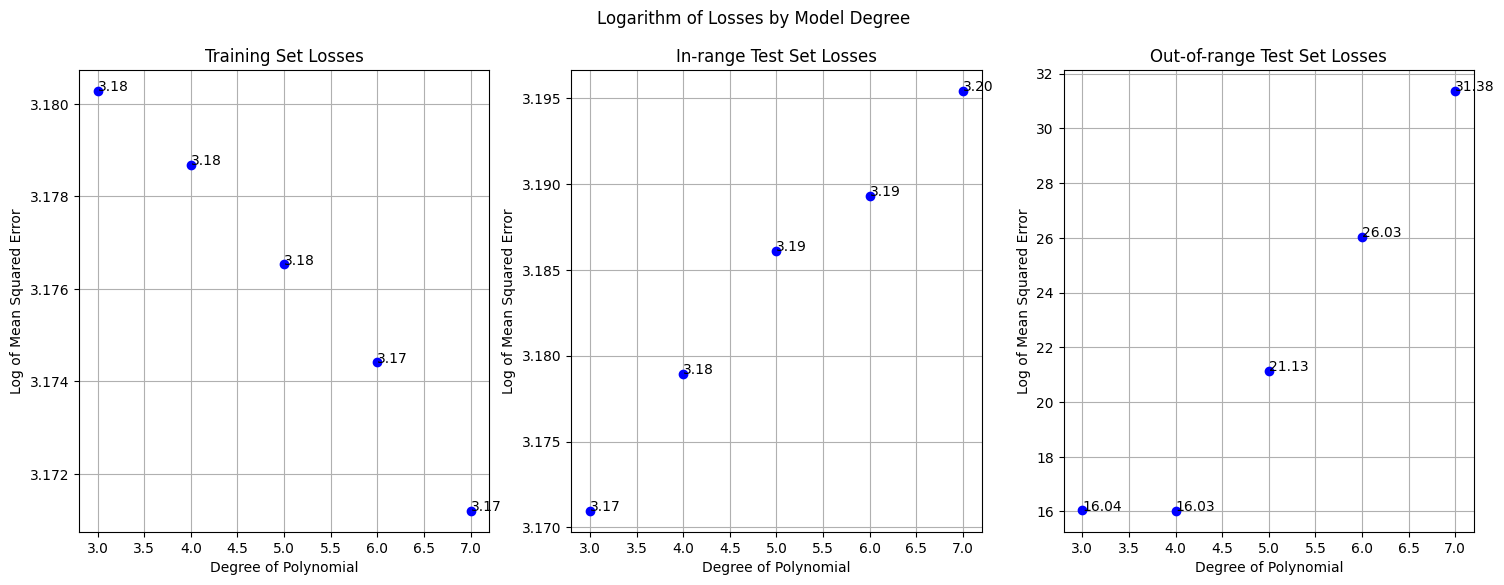

In [18]:
import numpy as np
from matplotlib import pyplot as plt

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 6))
fig.suptitle('Logarithm of Losses by Model Degree')

def plot_losses(ax, losses, title):
    for degree in degrees:
        avg_log_loss = np.log(np.mean(losses[degree]))
        ax.plot(degree, avg_log_loss, 'bo')
        ax.text(degree, avg_log_loss, f"{avg_log_loss:.2f}")
    ax.set_title(title)
    ax.set_xlabel('Degree of Polynomial')
    ax.set_ylabel('Log of Mean Squared Error')
    ax.grid(True)


plot_losses(ax1, training_losses, 'Training Set Losses')
plot_losses(ax2, in_range_losses, 'In-range Test Set Losses')
plot_losses(ax3, out_range_losses, 'Out-of-range Test Set Losses')

plt.show()


## Conclusion (10 Points)

Now print out the losses on each set here.

In [19]:
# Function to calculate and print average losses
def print_average_losses(losses_dict, description):
    print(f"Average Losses for {description}:")
    for degree in degrees:
        avg_loss = np.mean(losses_dict[degree])
        print(f"Degree {degree}: {avg_loss:.2f}")

# Printing average losses for each set
print_average_losses(training_losses, "Training Set")
print("\n")
print_average_losses(in_range_losses, "In-Range Test Set")
print("\n")
print_average_losses(out_range_losses, "Out-of-Range Test Set")


Average Losses for Training Set:
Degree 3: 24.05
Degree 4: 24.02
Degree 5: 23.96
Degree 6: 23.91
Degree 7: 23.84


Average Losses for In-Range Test Set:
Degree 3: 23.83
Degree 4: 24.02
Degree 5: 24.19
Degree 6: 24.27
Degree 7: 24.42


Average Losses for Out-of-Range Test Set:
Degree 3: 9272699.35
Degree 4: 9133238.01
Degree 5: 1494837856.32
Degree 6: 201412187322.54
Degree 7: 42273849247907.08


With comparing the loss of **training set and the in-range test set** and also **in-range test set and the out-of-range test set**, specially in higher degrees, what we can conclude about the bias - variance trade off?

**Answer:**

When using polynomial regression models, here's what we observe:

1. **Higher-degree models fit the training data really well**: They capture every tiny detail, even noise, which might seem great but leads to overfitting. This means they're too tailored to the training data.

2. **Overfitting hurts generalization**: These complex models perform poorly on new, especially out-of-range, data because they can't adapt to differences from the training set. They're great with familiar data but struggle with anything new.

3. **Balance is key**: Lower-degree models might miss some data details but handle new situations better. So, finding a balance between fitting the training data well and maintaining flexibility for new data is crucial.

In essence, while higher degrees can nail the training data, they falter on new challenges, showing the classic trade-off between fitting known data perfectly and performing well on new, unseen data.

Expected to explain overfitiing on the training set and also the face that model has less generalization to unseen data.


